In [49]:
# necessary libraries required for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [50]:
df=pd.read_csv('apple_quality.csv')   # reading csv file
df.head(2)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809367,good


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [52]:
df.isnull().sum().sort_values(ascending=False)  # checking dataframe for nujll values

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Quality        1
Acidity        0
dtype: int64

In [53]:
import missingno as msn            # visualizing missing data

<Axes: >

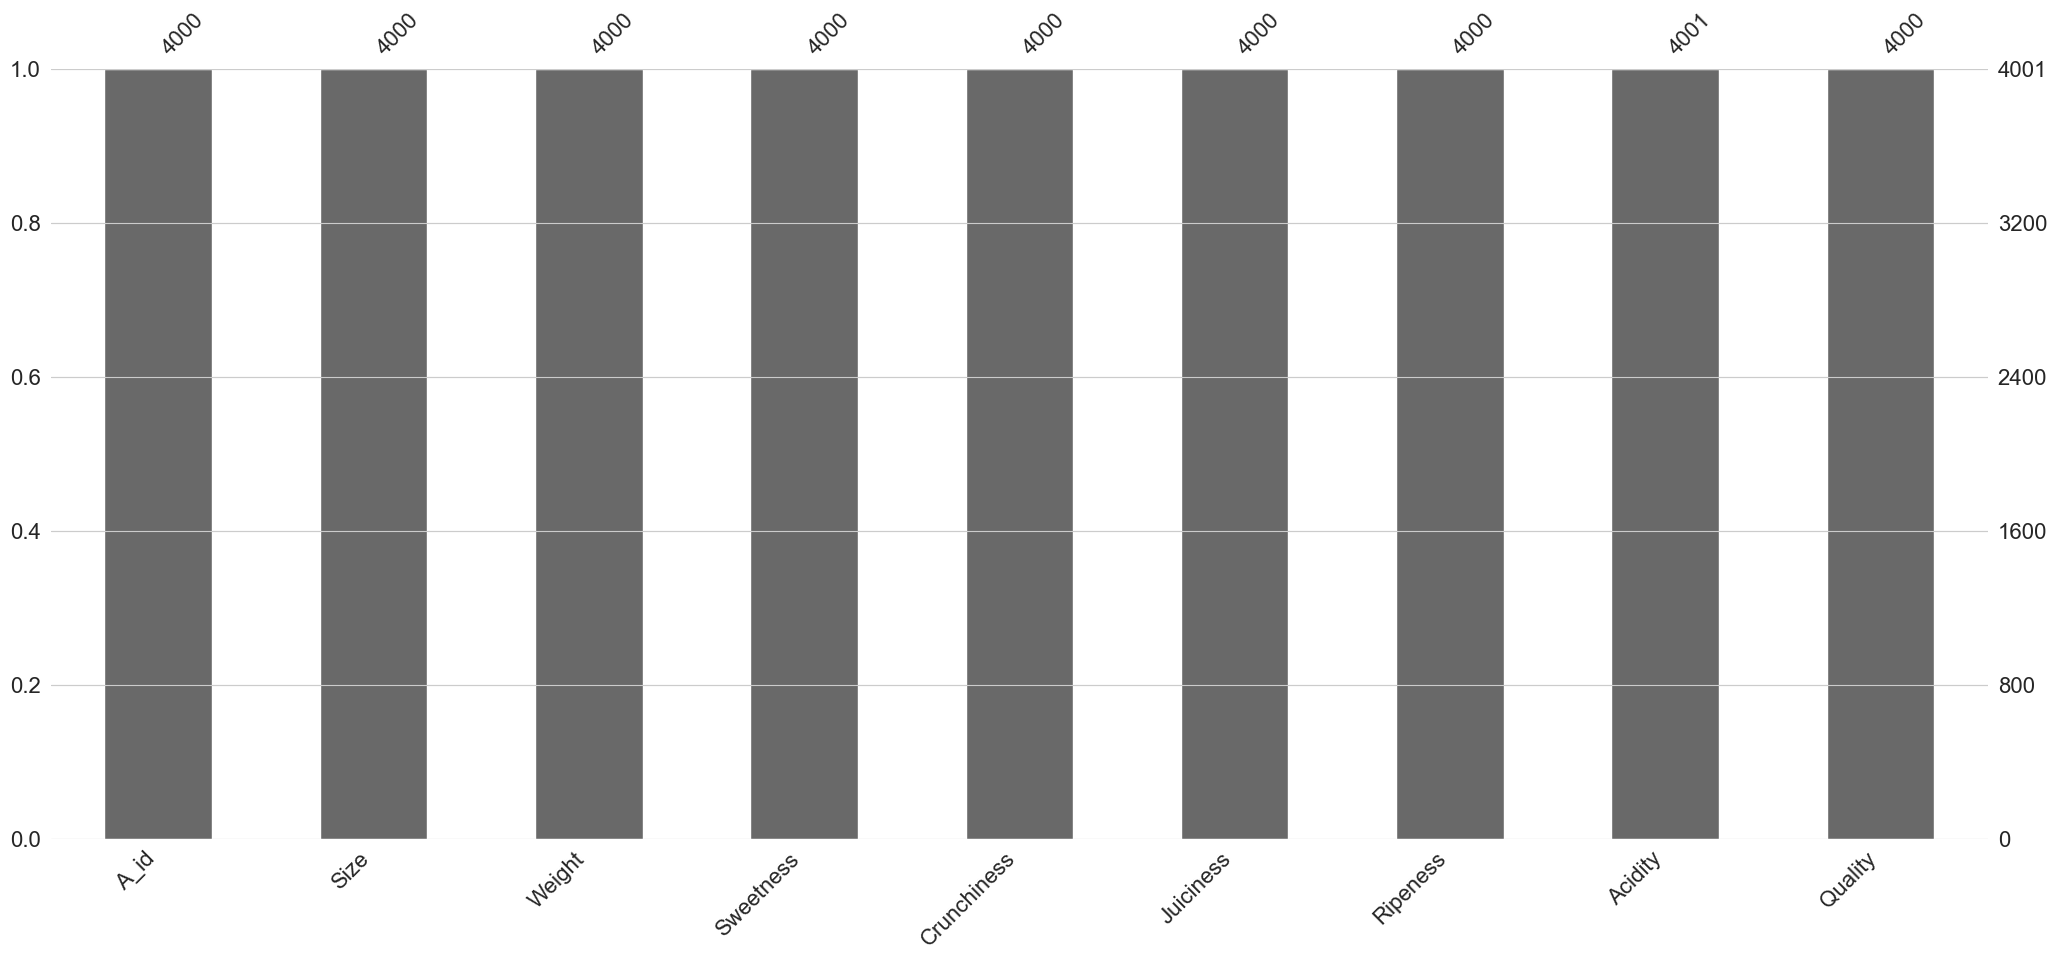

In [54]:
msn.bar(df)

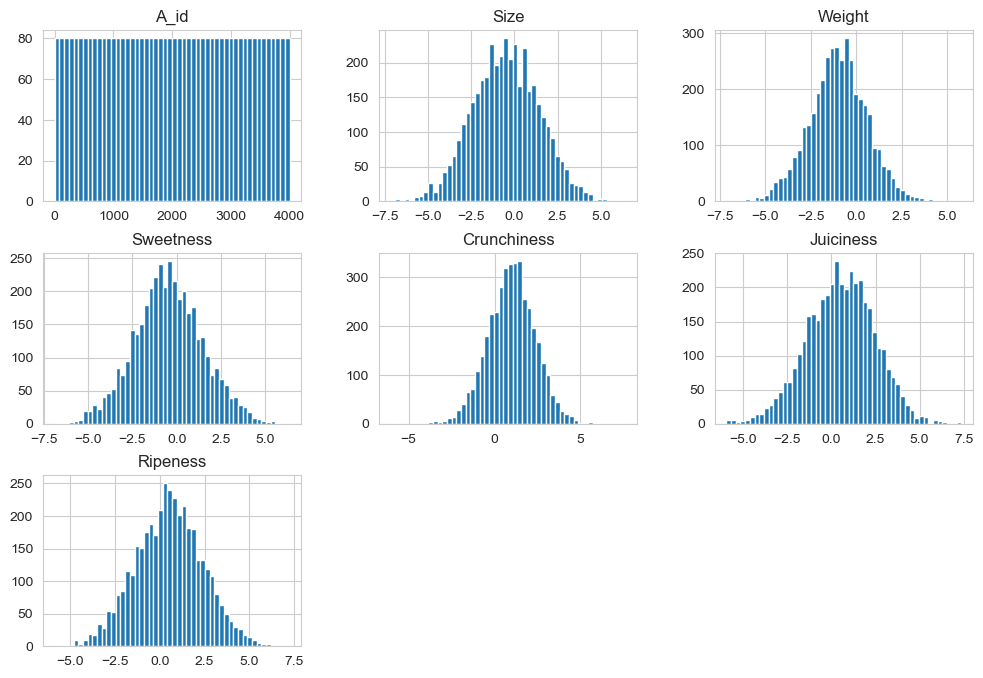

In [55]:
df.hist(figsize=(12,8),bins=50)             #visualizing distribution of data 
plt.show()                                  #most of the columns have normal distribution

In [56]:
df.dropna(inplace=True,subset='Quality')                # droping null values

In [59]:
df.isnull().sum()                       # checking of null values

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [173]:
df.corr()['Quality'].sort_values(ascending=False)

Quality        1.000000
Juiciness      0.260223
Sweetness      0.250998
Size           0.244007
Weight         0.001421
Acidity       -0.007697
Crunchiness   -0.012376
Ripeness      -0.264315
Name: Quality, dtype: float64

In [62]:
df['Quality'].value_counts()            #checking distribution of target variable
                                        #target variable is balanced

Quality
good    2004
bad     1996
Name: count, dtype: int64

In [63]:
df.drop('A_id',inplace=True,axis=1)         #dropping A_id as its not important column for prediction

In [65]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [66]:
from sklearn.preprocessing import LabelEncoder                  
le=LabelEncoder()

In [67]:
df['Quality']=le.fit_transform(df['Quality'])               #label encoding of the target variable

In [68]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


In [71]:
X=df.drop('Quality',axis=1)             #splitting datasets into x and y sets
y=df['Quality']

In [72]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler=StandardScaler()                #scaling data into same scale

In [75]:
x_sc=scaler.fit_transform(X=X,y=None)

In [76]:
x_sc=pd.DataFrame(x_sc,columns=scaler.get_feature_names_out())

In [77]:
x_sc

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472
...,...,...,...,...,...,...,...
3995,0.291729,-0.048594,-1.669449,-0.365345,0.614425,0.931482,0.028866
3996,0.108878,1.834105,0.137124,-1.159058,-0.252634,-0.846326,0.842347
3997,-1.105655,-0.716904,-1.013784,-0.234036,0.874379,2.275957,-0.668950
3998,-1.818112,-0.492908,1.459901,-0.845446,0.854549,-0.151419,-1.093171


In [78]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.3,random_state=42)    # splitting into train and test splits

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf=RandomForestClassifier()             #using randomforest for classification

In [86]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [88]:
y_pred=rf.predict(X_test)           # applying predictions over the test set

In [98]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,confusion_matrix,classification_report   #importing metrics for checking model performance

In [99]:
confusion_matrix(y_test,y_pred)         #confusion matrix

array([[529,  64],
       [ 64, 543]], dtype=int64)

In [100]:
accuracy_score(y_test,y_pred)

0.8933333333333333

In [94]:
recall_score(y_test,y_pred)

0.8945634266886326

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       593
           1       0.89      0.89      0.89       607

    accuracy                           0.89      1200
   macro avg       0.89      0.89      0.89      1200
weighted avg       0.89      0.89      0.89      1200


In [95]:
from sklearn.linear_model import LogisticRegression

In [103]:
logimodel=LogisticRegression()     

In [116]:
logimodel.fit(X_train,y_train)    #using logistic Regression for prediction

LogisticRegression()

In [117]:
logi_predict=logimodel.predict(X_test)

In [118]:
accuracy_score(y_test,logi_predict)

0.7525

In [119]:
recall_score(y_test,logi_predict)

0.7594728171334432

In [120]:
confusion_matrix(y_test,logi_predict)

array([[442, 151],
       [146, 461]], dtype=int64)

In [121]:
from sklearn.model_selection import cross_val_score

In [122]:
cross_val_score(logimodel,X_test,y_test,cv=10).mean()   #verifying logistic regression model performance with cross val score

0.7575

In [124]:
print(classification_report(y_test,logi_predict))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       593
           1       0.75      0.76      0.76       607

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200


In [125]:
from sklearn.svm import SVC             

In [126]:
svc=SVC()                   #SVC classifier for classification

In [127]:
svc.fit(X_train,y_train)

SVC()

In [128]:
sv_predict=svc.predict(X_test)

In [129]:
accuracy_score(y_test,sv_predict)

0.8958333333333334

In [130]:
recall_score(y_test,sv_predict)

0.8912685337726524

In [ ]:
confusion_matrix(y_test,sv_predict)

In [132]:
print(classification_report(y_test,sv_predict))         #classification report for svc model

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       593
           1       0.90      0.89      0.90       607

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200


In [137]:
from xgboost import XGBClassifier           # using XGBoost classifier

In [138]:
xgb=XGBClassifier()

In [139]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [140]:
xgb_predict=xgb.predict(X_test)

In [146]:
confusion_matrix(y_test,xgb_predict)

array([[536,  57],
       [ 64, 543]], dtype=int64)

In [147]:
accuracy_score(y_test,xgb_predict)

0.8991666666666667

In [148]:
recall_score(y_test,xgb_predict)

0.8945634266886326

In [149]:
from sklearn.ensemble import AdaBoostClassifier         # using Adaboost for classification

In [150]:
adaboost=AdaBoostClassifier()

In [151]:
adaboost

AdaBoostClassifier()

In [152]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [153]:
ada_predict=adaboost.predict(X_test)

In [154]:
accuracy_score(y_test,ada_predict)

0.7725

In [155]:
recall_score(y_test,ada_predict)

0.7693574958813838

In [156]:
confusion_matrix(y_test,ada_predict)

array([[460, 133],
       [140, 467]], dtype=int64)

In [157]:
print(classification_report(y_test,ada_predict))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       593
           1       0.78      0.77      0.77       607

    accuracy                           0.77      1200
   macro avg       0.77      0.77      0.77      1200
weighted avg       0.77      0.77      0.77      1200


In [161]:
from sklearn.metrics import RocCurveDisplay      #ROC curve for visualizing the performance of each model

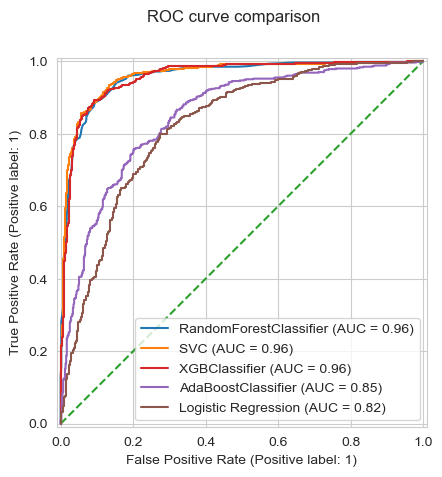

In [162]:
fig = RocCurveDisplay.from_estimator(rf, X_test, y_test)
fig = RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=fig.ax_)
plt.plot([0, 1], [0, 1], '--')
fig = RocCurveDisplay.from_estimator(xgb, X_test, y_test, ax=fig.ax_)
fig = RocCurveDisplay.from_estimator(adaboost, X_test, y_test, ax=fig.ax_)
fig = RocCurveDisplay.from_estimator(logimodel, X_test, y_test, ax=fig.ax_, name='Logistic Regression')
fig.figure_.suptitle("ROC curve comparison");

# conclusion
we have done all the elementry EDA steps needed and plotted various graphs to determine the correlation among the independent variables and also between the independent and dependent variable.

After feature selection we used five machine learning models and achieved quite good accuracy. 
Randomforest,SVC and XGBoost able to achive very good accuracy.
Adaboost and Logistic regression also performs well as seen by ROC curve and AUC score